<a href="https://colab.research.google.com/github/Abkhenaten/Natural-Language-Procesing/blob/master/Trump_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:

#Get authorization to use API
consumer_key = 'bmAwDAGkvpUftEIwNdV136ZIW'
consumer_secret = 'ufjZg1jNrZXb0LcSILfyvFzL67DxjvvM46MQVkFBQpYUZpkRS0'
access_token = '1180545866425409536-Mh3SnW1n6Nmsayz3wpYbmPmoJmXUl1'
access_token_secret = 'lqEnbXWSaRwtmWLzogOJKSNSrMTbiumyIXZf3aool6ZeQ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

user = api.me()
print(user.name)


Abkhe


In [ ]:
#Extract latest tweets
tweets = []

for page in range(1,5):
  tweets.extend(api.user_timeline(screen_name='realDonaldTrump', count=200, page=page))

  print('Number of tweets extracted: {}. \n'.format(len(tweets)))

Number of tweets extracted: 200. 

Number of tweets extracted: 400. 

Number of tweets extracted: 598. 

Number of tweets extracted: 797. 



In [ ]:
for tweet in tweets[:5]:
  print(tweet.text)

Just departed the White House for Minnesota! #MAGA https://t.co/nAdxls0z8C
Thank you! https://t.co/KVayfCydRd
https://t.co/Zm6Lqzgppq
https://t.co/V3jQCWm9uJ
RT @GroverNorquist: Joe Biden will raise taxes on people making under $400,000. 
You do not want to believe that?Watch Biden say it himself…


In [ ]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]
for tweet in tweets[:5]:
  print(tweet.text)
  

Just departed the White House for Minnesota! #MAGA https://t.co/nAdxls0z8C
Thank you! https://t.co/KVayfCydRd
https://t.co/Zm6Lqzgppq
https://t.co/V3jQCWm9uJ
RT @GroverNorquist: Joe Biden will raise taxes on people making under $400,000. 
You do not want to believe that?Watch Biden say it himself…


In [ ]:
#Create dataframe of tweets.
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets], columns=['Date', 'Tweet', 'Length', 'ID', 'Likes', 'Retweets'])

In [ ]:
df.head()

,Date,Tweet,Length,ID,Likes,Retweets
0,2020-09-30 19:42:57,Just departed the White House for Minnesota! #...,74,1311391100171476992,16227,3667
1,2020-09-30 19:41:39,Thank you! https://t.co/KVayfCydRd,34,1311390772306952193,15698,4436
2,2020-09-30 19:40:47,https://t.co/Zm6Lqzgppq,23,1311390554450657281,11707,4318
3,2020-09-30 19:40:11,https://t.co/V3jQCWm9uJ,23,1311390404831444992,9470,3134
4,2020-09-30 19:22:36,Thank you Ari! https://t.co/ghPg3w2jmc,38,1311385979278647296,16768,4566


In [ ]:
df[df['Likes']==df['Likes'].max()]

,Date,Tweet,Length,ID,Likes,Retweets
76,2020-09-28 14:33:31,Joe Biden just announced that he will not agre...,82,1310588453277650945,407181,85657


In [ ]:
df['Likes'].describe()

count       446.000000
mean      80216.708520
std       61279.167449
min           0.000000
25%       37402.250000
50%       60438.000000
75%      106246.500000
max      407181.000000
Name: Likes, dtype: float64

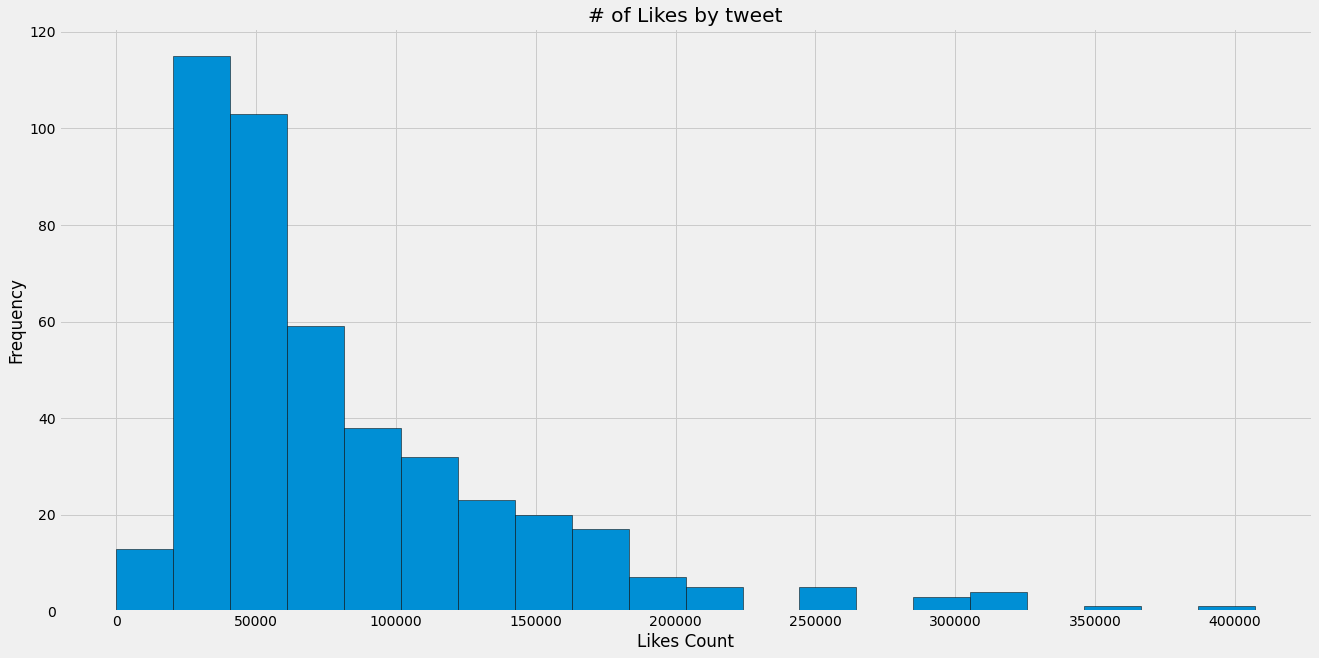

In [ ]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20, 10), ec='black')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('# of Likes by tweet')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()
f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweet'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Tweet,Length,ID,Likes,Retweets,Sentiment
0,2020-09-30,Just departed the White House for Minnesota! #...,74,1311391100171476992,16227,3667,0.0000
1,2020-09-30,Thank you! https://t.co/KVayfCydRd,34,1311390772306952193,15698,4436,0.4199
2,2020-09-30,https://t.co/Zm6Lqzgppq,23,1311390554450657281,11707,4318,0.0000
3,2020-09-30,https://t.co/V3jQCWm9uJ,23,1311390404831444992,9470,3134,0.0000
4,2020-09-30,Thank you Ari! https://t.co/ghPg3w2jmc,38,1311385979278647296,16768,4566,0.4199


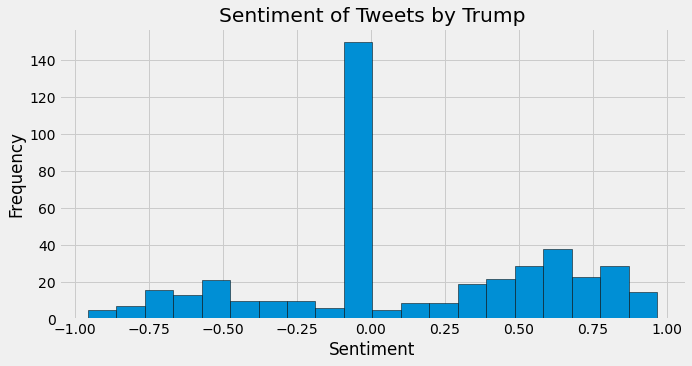

In [ ]:
#Where do sentiment lay.
df['Sentiment'].plot(kind='hist', bins=20, figsize=(10,5), ec='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment of Tweets by Trump')
plt.show()

In [ ]:
date_df = df.groupby(['Date']).mean().reset_index()

Text(0.5, 0, 'Daily Average Sentiment of Tweets')

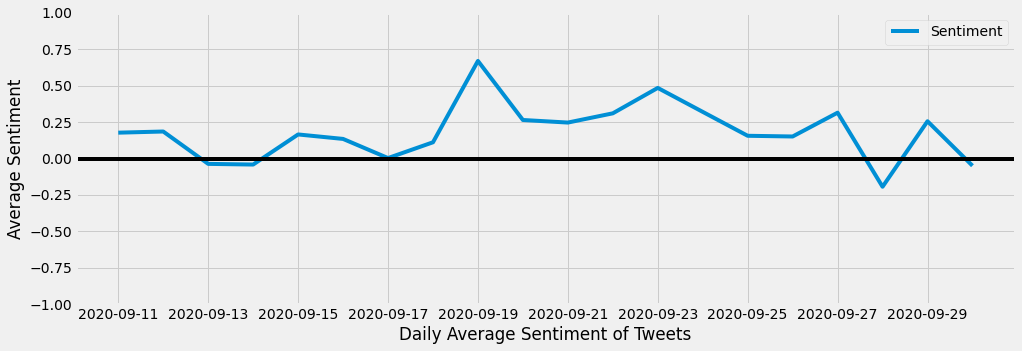

In [ ]:
date_df.plot(kind='line', x='Date', y='Sentiment', figsize=(15,5), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.ylabel('Average Sentiment')
plt.xlabel('Daily Average Sentiment of Tweets')

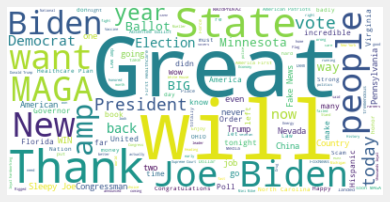

In [ ]:
#Creating word cloud
from wordcloud import WordCloud, STOPWORDS

text =  " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(['HTTPS', 'CO'])

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()